# Data wrangling WeRateDogs DAND project

#### By Harshal Kulkarni

# Introduction

Data wrangling is one of the core skill that everyone who works with data should be familiar with since so much of the world's data isn't clean. We need to wrangle our data for good outcomes, otherwise there could be consequences. If we analyze, visualize, or model our data before we wrangle it, our consequences could be making mistakes, missing out on cool insights, and wasting time. So best practices say wrangle. Always.

Through this project will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it.

The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user __[@dog_rates](hhttps://twitter.com/dog_rates)__, also known as WeRateDogs.

# Gather

Gathering Data for this Project composed from three pieces of data as described below:

‚Ä¢The WeRateDogs Twitter archive. We will download this file manually the file name: 
 twitter_archive_enhanced.csv

‚Ä¢The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL:
https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv

‚Ä¢Each tweet's retweet count and favorite (i.e. "like") count at minimum, and any additional data we will find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, we will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data should be written to its own line. Then we will read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.

#### Lets Start

In [3]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import time
from IPython.display import clear_output
import re
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [4]:
# check the twitter archive csv file, which is downloaded manually
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name doggo floofer pupper puppo  
0                  10   Phineas  None    None   None  None  
1                  10     Tilly  None    None   None  None  
2                  10    Archie  None    None   None  None  
3                  10     Darla  None    None   None  None  
4                  10  Franklin  None    None   None  None

In [5]:
# download tsv file from Udacity's server programmatically using the requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [6]:
# check the tsv file to make sure that the download is successful
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [5]:

# check the twitter archive csv file, which is downloaded manually
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [9]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

In [10]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,
                 parser=tweepy.parsers.JSONParser(),
                 wait_on_rate_limit=True,
                 wait_on_rate_limit_notify=True)


In [11]:
error_list = list()
query_success_count = 0
for tweet_id in twitter_archive.tweet_id:
    try:
        # get the start time of query
        start_time = time.time()
        # query each id using get_status
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        # open the tweet_json.txt file in append mode
        with open('tweet_json.txt', 'a') as file:
            # write each tweet's JSON data in a new line
            file.write(json.dumps(tweet) + '\n')
        # count the number of successes in querying the status and recording its data
        query_success_count += 1
        # get the end time of query
        end_time = time.time()
        clear_output()
        print('Query for id {} successful. Time taken (s): {}'.format(tweet_id, end_time-start_time))
    except Exception as e:
        # record exceptions in a list of dictionaries
        error_list.append({'tweet_id': int(tweet_id), 'error': e})
        clear_output()
        print('Query for id {} unsuccessful. Error recorded in error_list'.format(tweet_id))
clear_output()
print('Query completed.')

Query completed.


In [12]:
# create an empty list
df_list = list()
# read the .txt file, line by line, and append the json data in each line to the list
with open('tweet_json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        fav_count = json_data['favorite_count']
        ret_count = json_data['retweet_count']
        df_list.append({'tweet_id': int(tweet_id),
                        'favorite_count': int(fav_count),
                        'retweet_count': int(ret_count)})

# create a pandas DataFrame using the list
df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
df.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           38251           8377
1  892177421306343426           32789           6184
2  891815181378084864           24691           4092
3  891689557279858688           41579           8519
4  891327558926688256           39751           9226

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [14]:
# save the dataframe to a csv file
df.to_csv('fav_ret_count.csv', index=False)

In [15]:
# convert the list of exceptions into a dataframe
error_df = pd.DataFrame(error_list, columns = ['tweet_id', 'error'])
error_df

tweet_id                                              error
0   888202515573088257  [{'code': 144, 'message': 'No status found wit...
1   873697596434513921  [{'code': 144, 'message': 'No status found wit...
2   872668790621863937  [{'code': 144, 'message': 'No status found wit...
3   869988702071779329  [{'code': 144, 'message': 'No status found wit...
4   866816280283807744  [{'code': 144, 'message': 'No status found wit...
5   861769973181624320  [{'code': 144, 'message': 'No status found wit...
6   845459076796616705  [{'code': 144, 'message': 'No status found wit...
7   842892208864923648  [{'code': 144, 'message': 'No status found wit...
8   837012587749474308  [{'code': 144, 'message': 'No status found wit...
9   827228250799742977  [{'code': 144, 'message': 'No status found wit...
10  802247111496568832  [{'code': 144, 'message': 'No status found wit...
11  775096608509886464  [{'code': 144, 'message': 'No status found wit...
12  770743923962707968  [{'code': 144, 'message': 'No status found wit...
13  754011816964026368  [{'code': 144, 'message': 'No status found wit...

In [16]:
# save the exceptions dataframe to a csv file
error_df.to_csv('query_errors.csv', index=False)

# Assessing Data: Iteration 1

In [17]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
fav_retweet_counts = pd.read_csv('fav_ret_count.csv')

In [18]:
twitter_archive

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689                    NaN                  NaN   
13    889638837579907072                    NaN                  NaN   
14    889531135344209921                    NaN                  NaN   
15    889278841981685760                    NaN                  NaN   
16    888917238123831296                    NaN                  NaN   
17    888804989199671297                    NaN                  NaN   
18    888554962724278272                    NaN                  NaN   
19    888202515573088257                    NaN                  NaN   
20    888078434458587136                    NaN                  NaN   
21    887705289381826560                    NaN                  NaN   
22    887517139158093824                    NaN                  NaN   
23    887473957103951883                    NaN                  NaN   
24    887343217045368832                    NaN                  NaN   
25    887101392804085760                    NaN                  NaN   
26    886983233522544640                    NaN                  NaN   
27    886736880519319552                    NaN                  NaN   
28    886680336477933568                    NaN                  NaN   
29    886366144734445568                    NaN                  NaN   
...                  ...                    ...                  ...   
2326  666411507551481857                    NaN                  NaN   
2327  666407126856765440                    NaN                  NaN   
2328  666396247373291520                    NaN                  NaN   
2329  666373753744588802                    NaN                  NaN   
2330  666362758909284353                    NaN                  NaN   
2331  666353288456101888                    NaN                  NaN   
2332  666345417576210432                    NaN                  NaN   
2333  666337882303524864                    NaN                  NaN   
2334  666293911632134144                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   
2336  666273097616637952                    NaN                  NaN   
2337  666268910803644416                    NaN                  NaN   
2338  666104133288665088                    NaN                  NaN   
2339  666102155909144576                    NaN                  NaN   
2340  666099513787052032                    NaN                  NaN   
2341  666094000022159362                    NaN                  NaN   
2342  666082916733198337                    NaN                  NaN   
2343  666073100786774016                    NaN                  NaN   
2344  666071193221509120                    NaN                  NaN   
2345  666063827256086533                    NaN                  NaN   
2346  666058600524156928                    NaN                  NaN   
2347  666057090499244032                    NaN                  NaN   
2348  666055525042405380                    NaN                  NaN   
2349  666051853826850816                    NaN         

In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [20]:
twitter_archive[twitter_archive.in_reply_to_status_id.notnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
149   863079547188785154           6.671522e+17         4.196984e+09   
179   857214891891077121           8.571567e+17         1.806710e+08   
184   856526610513747968           8.558181e+17         4.196984e+09   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
251   844979544864018432           7.590995e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
565   802265048156610565           7.331095e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
...                  ...                    ...                  ...   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1501  692142790915014657           6.920419e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1630  684538444857667585           6.844811e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1842  675870721063669760           6.757073e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1852  675707330206547968           6.754971e+17         4.196984e+09   
1866  675349384339542016           6.749998e+17         4.196984e+09   
1882  674999807681908736           6.747934e+17         4.196984e+09   
1885  674793399141146624           6.717299e+17         4.196984e+09   
1892  674754018082705410           6.747522e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [22]:
twitter_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [23]:
sum(twitter_archive.duplicated())

0

In [24]:
twitter_archive.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [26]:
twitter_archive.pupper.unique()

array(['None', 'pupper'], dtype=object)

In [27]:
twitter_archive.puppo.unique()

array(['None', 'puppo'], dtype=object)

In [28]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [29]:
twitter_archive[twitter_archive.expanded_urls.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
30    886267009285017600           8.862664e+17         2.281182e+09   
55    881633300179243008           8.816070e+17         4.738443e+07   
64    879674319642796034           8.795538e+17         3.105441e+09   
113   870726314365509632           8.707262e+17         1.648776e+07   
148   863427515083354112           8.634256e+17         7.759620e+07   
179   857214891891077121           8.571567e+17         1.806710e+08   
185   856330835276025856                    NaN                  NaN   
186   856288084350160898           8.562860e+17         2.792810e+08   
188   855862651834028034           8.558616e+17         1.943518e+08   
189   855860136149123072           8.558585e+17         1.361572e+07   
218   850333567704068097           8.503288e+17         2.195506e+07   
228   848213670039564288           8.482121e+17         4.196984e+09   
234   847617282490613760           8.476062e+17         4.196984e+09   
274   840698636975636481           8.406983e+17         8.405479e+17   
290   838150277551247360           8.381455e+17         2.195506e+07   
291   838085839343206401           8.380855e+17         2.894131e+09   
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
346   831926988323639298           8.319030e+17         2.068372e+07   
375   828361771580813312                    NaN                  NaN   
387   826598799820865537           8.265984e+17         4.196984e+09   
409   823333489516937216           8.233264e+17         1.582854e+09   
427   821153421864615936           8.211526e+17         1.132119e+08   
498   813130366689148928           8.131273e+17         4.196984e+09   
513   811647686436880384           8.116272e+17         4.196984e+09   
570   801854953262350336           8.018543e+17         1.185634e+07   
576   800859414831898624           8.008580e+17         2.918590e+08   
611   797165961484890113           7.971238e+17         2.916630e+07   
701   786051337297522688           7.727430e+17         7.305050e+17   
707   785515384317313025                    NaN                  NaN   
843   766714921925144576           7.667118e+17         4.196984e+09   
857   763956972077010945           7.638652e+17         1.584641e+07   
967   750381685133418496           7.501805e+17         4.717297e+09   
1005  747651430853525504           7.476487e+17         4.196984e+09   
1080  738891149612572673           7.384119e+17         3.589728e+08   
1295  707983188426153984           7.079801e+17         2.319108e+09   
1345  704491224099647488           7.044857e+17         2.878549e+07   
1445  696518437233913856                    NaN                  NaN   
1446  696490539101908992           6.964887e+17         4.196984e+09   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1479  693582294167244802           6.935722e+17         1.198989e+09   
1497  692423280028966913           6.924173e+17         4.196984e+09   
1523  690607260360429569           6.903413e+17         4.670367e+08   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1605  685681090388975616           6.855479e+17         4.196984e+09   
1618  684969860808454144           6.849598e+17         4.196984e+09   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1689  681340665377193984           6.813394e+17         4.196984e+09   
1774  678023323247357953           6.780211e+17         4.196984e+09   
1819  676590572941893632           6.765883e+17         4.196984e+09   
1844  675849018447167488           6.758457e+17         4.196984e+09   
1895  674742531037511680           6.747400e+17         4.196984e+09   
1905  674606911342424069           6.744689e+17         4.196984e+09   
1914  674330906434379776           6.658147e+17         1.637468e+07   
1940  673716320723169284           6.737159e+17         

In [30]:
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

In [31]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [32]:
sum(image_predictions.duplicated())

0

In [33]:
fav_retweet_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(3)
memory usage: 55.0 KB


In [34]:
sum(fav_retweet_counts.duplicated())

0

### Tidiness

    ‚Ä¢duplicated data in the form of retweets in the twitter_archive table
    ‚Ä¢one variable (dog stage) in 4 columns (doggo, floofer, pupper, puppo) in twitter_archive table
    ‚Ä¢fav_retweet_counts table might also contain data of retweets
    ‚Ä¢fav_retweet_counts should be part of the twitter_archive table
    ‚Ä¢image_predictions should be part of the twitter_archive table
    
### Quality
#### twitter_archive table

    ‚Ä¢timestamp and retweeted_status_timestamp are in strings format instead of datetime
    ‚Ä¢rows with NaN values in expanded_url column do not have images
    ‚Ä¢some tweets have been deleted (recorded in query_errors.csv)
    ‚Ä¢values in the source column contain html tags
    
# Cleaning Data

In [35]:
twitter_archive_clean = twitter_archive.copy()

### Tidiness
    ‚Ä¢twitter_archive: duplicated data in the form of retweets
    
#### Define

    ‚Ä¢Drop the rows with non-null values in retweeted_status_id column. 
    ‚Ä¢Afterwards, drop the retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns.

#### Code (drop rows with non-null values)

In [36]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]

#### Test

In [37]:
twitter_archive_clean.retweeted_status_id.notnull().sum()

0

#### Code (drop retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp columns)

In [38]:
twitter_archive_clean.drop(columns=['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'],
                           inplace=True)

#### Test

In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


#### twitter_archive: one variable (dog stage) in 4 columns (doggo, floofer, pupper, puppo)

#### Define
    ‚Ä¢Create a dog_stage column by extracting the terms doggo, floofer, pupper, and puppo from the text column. Drop the doggo, floofer, pupper, puppo columns.

#### Code

In [40]:
# use extract method to create a dog_stage column
twitter_archive_clean['dog_stage'] = twitter_archive_clean['text'].str.extract('(doggo|floofer|pupper|puppo)', expand=True)
    

In [41]:
twitter_archive_clean.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                364 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


In [43]:
twitter_archive_clean.dog_stage.value_counts()

pupper     244
doggo       84
puppo       32
floofer      4
Name: dog_stage, dtype: int64

#### fav_retweet_counts: should be part of twitter_archive table; possible duplicates in the form of retweets

#### Define

Merge twitter_archive table with fav_retweet_counts table using inner merge. twitter_archive does not contain retweet data, while fav_retweet_counts does not contain missing/deleted tweets. By using an inner merge, retweet data from fav_retweet_counts and deleted tweets in twitter_archive will not be included in the merged table.

#### Code

In [44]:
twitter_archive_clean = pd.merge(twitter_archive_clean, fav_retweet_counts, on='tweet_id', how='inner')

#### Test

In [45]:
twitter_archive_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  favorite_count  retweet_count  
0                  10   Phineas       NaN           38251           8377  
1                  10     Tilly       NaN           32789           6184  
2                  10    Archie       NaN           24691           4092  
3                  10     Darla       NaN           41579           8519  
4                  10  Franklin       NaN           39751           9226

In [46]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2174 entries, 0 to 2173
Data columns (total 13 columns):
tweet_id                 2174 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2174 non-null object
source                   2174 non-null object
text                     2174 non-null object
expanded_urls            2116 non-null object
rating_numerator         2174 non-null int64
rating_denominator       2174 non-null int64
name                     2174 non-null object
dog_stage                364 non-null object
favorite_count           2174 non-null int64
retweet_count            2174 non-null int64
dtypes: float64(2), int64(5), object(6)
memory usage: 237.8+ KB


#### image_predictions should be part of the twitter_archive table

#### Define
‚Ä¢Merge image_predictions table with twitter_archive table using inner merge

#### Code

In [47]:
twitter_archive_clean = pd.merge(twitter_archive_clean, image_predictions, on='tweet_id', how='inner')

#### Test

In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                326 non-null object
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993

In [49]:
# set panda's option to display all 24 columns
pd.set_option('display.max_columns', 24)

twitter_archive_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   
1  2017-08-01 00:17:27 +0000   
2  2017-07-31 00:18:03 +0000   
3  2017-07-30 15:58:51 +0000   
4  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  favorite_count  retweet_count  \
0                  10   Phineas       NaN           38251           8377   
1                  10     Tilly       NaN           32789           6184   
2                  10    Archie       NaN           24691           4092   
3                  10     Darla       NaN           41579           8519   
4                  10  Franklin       NaN           39751           9226   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  
0                       banana  0.076110   False  
1                     papillon  0.068957    True  
2                       kelpie  0.031379    True  
3                      spatula  0.040836   False  
4  German_short-haired_pointer  0.175219    True

### Quality

#### twitter_archive: rows with NaN values in expanded_urls column do not have images

#### Define

    ‚Ä¢Drop rows with NaN values in expanded_urls column

#### Code

In [50]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.expanded_urls.notnull()]

#### Test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                326 non-null object
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993

#### twitter_archive: incorrect data type for timestamp column

#### Define
    ‚Ä¢Convert timestamp data from strings to datetime objects.

#### Code

In [52]:
twitter_archive_clean.timestamp = pd.to_datetime(twitter_archive_clean.timestamp)

#### Test

In [53]:
twitter_archive_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

            timestamp                                             source  \
0 2017-08-01 16:23:56  <a href="http://twitter.com/download/iphone" r...   
1 2017-08-01 00:17:27  <a href="http://twitter.com/download/iphone" r...   
2 2017-07-31 00:18:03  <a href="http://twitter.com/download/iphone" r...   
3 2017-07-30 15:58:51  <a href="http://twitter.com/download/iphone" r...   
4 2017-07-29 16:00:24  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name dog_stage  favorite_count  retweet_count  \
0                  10   Phineas       NaN           38251           8377   
1                  10     Tilly       NaN           32789           6184   
2                  10    Archie       NaN           24691           4092   
3                  10     Darla       NaN           41579           8519   
4                  10  Franklin       NaN           39751           9226   

                                           jpg_url  img_num           p1  \
0  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1       orange   
1  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1    Chihuahua   
2  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1    Chihuahua   
3  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1  paper_towel   
4  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2       basset   

    p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0  0.097049   False               bagel  0.085851   False   
1  0.323581    True            Pekinese  0.090647    True   
2  0.716012    True            malamute  0.078253    True   
3  0.170278   False  Labrador_retriever  0.168086    True   
4  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  
0                       banana  0.076110   False  
1                     papillon  0.068957    True  
2                       kelpie  0.031379    True  
3                      spatula  0.040836   False  
4  German_short-haired_pointer  0.175219    True

In [54]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                326 non-null object
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf              

#### twitter_archive: html tags are present in source column

#### Define

    ‚Ä¢Remove html tags using regular expression and the str.replace() method

#### Code

In [55]:
twitter_archive_clean.source = twitter_archive_clean.source.str.replace(r'<[^>]*>', '')

#### Test

In [56]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

# Assessing Data: Iteration 2

In [58]:
twitter_archive_clean.rating_numerator.value_counts()

12      449
10      419
11      396
13      261
9       151
8        95
7        52
14       35
5        33
6        32
3        19
4        16
2         9
1         5
0         2
420       1
24        1
1776      1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
26        1
Name: rating_numerator, dtype: int64

In [59]:
twitter_archive_clean.rating_denominator.value_counts()

10     1975
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

Some ratings do not have a denominator of 10. Proceed to check rows with a denominator that is not 10.

In [60]:
# temporarily set column width to 1000 to see the full text
pd.set_option('display.max_colwidth', 1000)
twitter_archive_clean.query('rating_denominator != 10')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
323   820690176645140481                    NaN                  NaN   
385   810984652412424192                    NaN                  NaN   
662   758467244762497024                    NaN                  NaN   
799   740373189193256964                    NaN                  NaN   
847   731156023742988288                    NaN                  NaN   
890   722974582966214656                    NaN                  NaN   
924   716439118184652801                    NaN                  NaN   
945   713900603437621249                    NaN                  NaN   
969   710658690886586372                    NaN                  NaN   
987   709198395643068416                    NaN                  NaN   
1053  704054845121142784                    NaN                  NaN   
1129  697463031882764288                    NaN                  NaN   
1301  684225744407494656           6.842229e+17         4.196984e+09   
1302  684222868335505415                    NaN                  NaN   
1327  682962037429899265                    NaN                  NaN   
1434  677716515794329600                    NaN                  NaN   
1493  675853064436391936                    NaN                  NaN   
1972  666287406224695296                    NaN                  NaN   

               timestamp              source  \
323  2017-01-15 17:52:40  Twitter for iPhone   
385  2016-12-19 23:06:23  Twitter for iPhone   
662  2016-07-28 01:00:57  Twitter for iPhone   
799  2016-06-08 02:41:38  Twitter for iPhone   
847  2016-05-13 16:15:54  Twitter for iPhone   
890  2016-04-21 02:25:47  Twitter for iPhone   
924  2016-04-03 01:36:11  Twitter for iPhone   
945  2016-03-27 01:29:02  Twitter for iPhone   
969  2016-03-18 02:46:49  Twitter for iPhone   
987  2016-03-14 02:04:08  Twitter for iPhone   
1053 2016-02-28 21:25:30  Twitter for iPhone   
1129 2016-02-10 16:51:59  Twitter for iPhone   
1301 2016-01-05 04:11:44  Twitter for iPhone   
1302 2016-01-05 04:00:18  Twitter for iPhone   
1327 2016-01-01 16:30:13  Twitter for iPhone   
1434 2015-12-18 05:06:23  Twitter for iPhone   
1493 2015-12-13 01:41:41  Twitter for iPhone   
1972 2015-11-16 16:11:11  Twitter for iPhone   

                                                                                                                                                                           text  \
323                                                                         The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd   
385   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
662                                                                                              Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE   
799                                After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
847                                                   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
890                                                                                                            Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a   
924                                                       This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq   
945                                                                               Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1   
969                                                                Here's a brigade of puppers. All look very prepared for 

    ‚Ä¢Row 385 does not have a rating. The '24/7' in the text is not a rating
    
    ‚Ä¢In some rows where there are more than one occurence of numbers in the format 'dd/dd', the first occurence is extracted as rating regardless of whether it truly is one.

In [61]:
# check the text of rows containing more than one occurence of numbers in the format 'dd/dd'
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\/\d+\D+\d+\/\d+')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
555   777684233540206592                    NaN                  NaN   
748   747600769478692864                    NaN                  NaN   
799   740373189193256964                    NaN                  NaN   
890   722974582966214656                    NaN                  NaN   
924   716439118184652801                    NaN                  NaN   
940   714258258790387713                    NaN                  NaN   
1061  703356393781329922                    NaN                  NaN   
1151  695064344191721472                    NaN                  NaN   
1156  694352839993344000                    NaN                  NaN   
1191  691483041324204033                    NaN                  NaN   
1206  690400367696297985                    NaN                  NaN   
1217  689835978131935233                    NaN                  NaN   
1327  682962037429899265                    NaN                  NaN   
1449  677314812125323265                    NaN                  NaN   
1483  676191832485810177                    NaN                  NaN   
1545  674737130913071104                    NaN                  NaN   
1549  674646392044941312                    NaN                  NaN   
1614  673295268553605120                    NaN                  NaN   
1654  672248013293752320                    NaN                  NaN   
1707  671154572044468225                    NaN                  NaN   
1756  670434127938719744                    NaN                  NaN   
1819  669037058363662336                    NaN                  NaN   
1856  668537837512433665                    NaN                  NaN   
1901  667544320556335104                    NaN                  NaN   
1910  667491009379606528                    NaN                  NaN   
1943  666835007768551424                    NaN                  NaN   
1972  666287406224695296                    NaN                  NaN   

               timestamp              source  \
555  2016-09-19 01:42:24  Twitter for iPhone   
748  2016-06-28 01:21:27  Twitter for iPhone   
799  2016-06-08 02:41:38  Twitter for iPhone   
890  2016-04-21 02:25:47  Twitter for iPhone   
924  2016-04-03 01:36:11  Twitter for iPhone   
940  2016-03-28 01:10:13  Twitter for iPhone   
1061 2016-02-26 23:10:06  Twitter for iPhone   
1151 2016-02-04 02:00:27  Twitter for iPhone   
1156 2016-02-02 02:53:12  Twitter for iPhone   
1191 2016-01-25 04:49:38  Twitter for iPhone   
1206 2016-01-22 05:07:29  Twitter for iPhone   
1217 2016-01-20 15:44:48  Twitter for iPhone   
1327 2016-01-01 16:30:13  Twitter for iPhone   
1449 2015-12-17 02:30:09  Twitter for iPhone   
1483 2015-12-14 00:07:50  Twitter for iPhone   
1545 2015-12-09 23:47:22  Twitter for iPhone   
1549 2015-12-09 17:46:48  Twitter for iPhone   
1614 2015-12-06 00:17:55  Twitter for iPhone   
1654 2015-12-03 02:56:30  Twitter for iPhone   
1707 2015-11-30 02:31:34  Twitter for iPhone   
1756 2015-11-28 02:48:46  Twitter for iPhone   
1819 2015-11-24 06:17:19  Twitter for iPhone   
1856 2015-11-22 21:13:35  Twitter for iPhone   
1901 2015-11-20 03:25:43  Twitter Web Client   
1910 2015-11-19 23:53:52  Twitter Web Client   
1943 2015-11-18 04:27:09  Twitter for iPhone   
1972 2015-11-16 16:11:11  Twitter for iPhone   

                                                                                                                                                     text  \
555                                   "Yep... just as I suspected. You're not flossing." 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ   
748                      This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ   
799          After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ   
890                       

Rows where the ratings are incorrectly extracted:

    ‚Ä¢800: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ
    ‚Ä¢891: Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
    ‚Ä¢925: This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
    ‚Ä¢1328: This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5
    ‚Ä¢1973: This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv

In [62]:
# check the text to see whether any rating numerators or denominators contain decimal numbers
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/(?:\d+\.)?\d+|(?:\d+\.)\d+\/\d+\.\d+')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
39    883482846933004288                    NaN                  NaN   
503   786709082849828864                    NaN                  NaN   
553   778027034220126208                    NaN                  NaN   
1373  680494726643068929                    NaN                  NaN   

               timestamp              source  \
39   2017-07-08 00:28:19  Twitter for iPhone   
503  2016-10-13 23:23:56  Twitter for iPhone   
553  2016-09-20 00:24:34  Twitter for iPhone   
1373 2015-12-25 21:06:00  Twitter for iPhone   

                                                                                                                                                                   text  \
39                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
503                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
553   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1373                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

                                                                                                                        expanded_urls  \
39    https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1   
503                                                                   https://twitter.com/dog_rates/status/786709082849828864/photo/1   
553                                                                   https://twitter.com/dog_rates/status/778027034220126208/photo/1   
1373                                                                  https://twitter.com/dog_rates/status/680494726643068929/photo/1   

      rating_numerator  rating_denominator    name dog_stage  favorite_count  \
39                   5                  10   Bella       NaN           45331   
503                 75                  10   Logan       NaN           19564   
553                 27                  10  Sophie       NaN            7028   
1373                26                  10    None    pupper            1800   

      retweet_count                                          jpg_url  img_num  \
39             9820  https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg        1   
503            6718  https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg        1   
553            1780  https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg        1   
1373            519  https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg        1   

                    p1   p1_conf  p1_dog                  p2   p2_conf  \
39    golden_retriever  0.943082    True  Labrador_retriever  0.032409   
503         Pomeranian  0.467321    True         Persian_cat  0.122978   
553            clumber  0.946718    True      cocker_spaniel  0.015950   
1373            kuvasz  0.438627    True             Samoyed  0.111622   

      p2_dog              p3   p3_conf  p3_dog  
39      True          kuvasz  0.005501    True  
503    False            chow  0.102654    True  
553     True           Lhasa  0.006519    True  
1373    True  Great_Pyrenees  0.064061    True

In the rows where there are decimal numbers in the ratings, only numbers after the decimal points are extracted to the rating_numerator column. For example, when the rating in the text is 13.5/10, the rating numerator extracted is 5 instead of 13.5.

In [63]:
twitter_archive_clean.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [64]:
sum(twitter_archive_clean.name == 'None')

546

In [65]:
none_names = twitter_archive_clean.query('name == "None"')
none_names.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1318  683462770029932544                    NaN                  NaN   
1531  674999807681908736           6.747934e+17         4.196984e+09   
757   746818907684614144           6.914169e+17         4.196984e+09   
81    872967104147763200                    NaN                  NaN   
439   797971864723324932                    NaN                  NaN   
1495  675822767435051008                    NaN                  NaN   
1169  693262851218264065                    NaN                  NaN   
1737  670778058496974848                    NaN                  NaN   
1196  691096613310316544                    NaN                  NaN   
1826  668988183816871936                    NaN                  NaN   

               timestamp              source  \
1318 2016-01-03 01:39:57  Twitter for iPhone   
1531 2015-12-10 17:11:09  Twitter for iPhone   
757  2016-06-25 21:34:37  Twitter for iPhone   
81   2017-06-09 00:02:31  Twitter for iPhone   
439  2016-11-14 01:18:12  Twitter for iPhone   
1495 2015-12-12 23:41:18  Twitter for iPhone   
1169 2016-01-30 02:41:58  Twitter for iPhone   
1737 2015-11-29 01:35:26  Twitter for iPhone   
1196 2016-01-24 03:14:07  Twitter for iPhone   
1826 2015-11-24 03:03:06  Twitter for iPhone   

                                                                                                                                                              text  \
1318                                                           "Hello forest pupper I am house pupper welcome to my abode" (8/10 for both) https://t.co/qFD8217fUT   
1531                                                         Ok last one of these. I may try to make some myself. Anyway here ya go. 13/10 https://t.co/i9CDd1oEu8   
757                                                                                                Guys... Dog Jesus 2.0\n13/10 buoyant af https://t.co/CuNA7OwfKQ   
81    Here's a very large dog. He has a date later. Politely asked this water person to check if his breath is bad. 12/10 good to go doggo https://t.co/EMYIdoblMR   
439                                              Here's a helicopter pupper. He takes off at random. H*ckin hard to control. 12/10 rare af https://t.co/GRWPgNKt2z   
1495                                                                                           üé∂ HELLO FROM THE OTHER SIIIIIIIIDE üé∂ 10/10s https://t.co/GK2HJtkdQk   
1169                                                             I hope you guys enjoy this beautiful snowy pupper as much as I did. 11/10 https://t.co/DYUsHtL2aR   
1737                                                                                                      "To bone or not to bone?"\n10/10 https://t.co/4g5kFdxp6g   
1196                  Here we see one dog giving a puptalk to another dog. Both are focused af. Left one has powerful feet. 11/10 for both https://t.co/fUacc13OrW   
1826                   Honor to rate this dog. Lots of fur on him. Two massive tumors on back. Should get checked out. Very neat tho. 7/10 https://t.co/bMhs18elNF   

                                                                                                                        expanded_urls  \
1318                                                                  https://twitter.com/dog_rates/status/683462770029932544/photo/1   
1531                                                                  https://twitter.com/dog_rates/status/674999807681908736/photo/1   
757                                                                   https://twitter.com/dog_rates/status/746818907684614144/photo/1   
81    https://twitter.com/dog_rates/status/872967104147763200/photo/1,https://twitter.com/dog_rates/status/872967104147763200/photo/1   
439   https://twitter.com/dog_rates/status/797971864723324932/photo/1,https://twitter.com/dog_rates/status/797971864723324932/photo/1   
1495                                   

In [66]:
# check whether any rows with 'None' in the name column contain the string 'name is' or 'named'
none_names[none_names.text.str.contains('name is|named')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
134   859607811541651456                    NaN                  NaN   
1341  682047327939461121                    NaN                  NaN   
1394  679736210798047232                    NaN                  NaN   
1808  669363888236994561                    NaN                  NaN   
1867  668268907921326080                    NaN                  NaN   
1905  667524857454854144                    NaN                  NaN   
1907  667509364010450944                    NaN                  NaN   

               timestamp              source  \
134  2017-05-03 03:17:27  Twitter for iPhone   
1341 2015-12-30 03:55:29  Twitter for iPhone   
1394 2015-12-23 18:51:56  Twitter for iPhone   
1808 2015-11-25 03:56:01  Twitter for iPhone   
1867 2015-11-22 03:24:58  Twitter for iPhone   
1905 2015-11-20 02:08:22  Twitter Web Client   
1907 2015-11-20 01:06:48  Twitter Web Client   

                                                                                                                                                                  text  \
134   Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0   
1341                            We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT   
1394                         This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP   
1808                           Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend https://t.co/jPkd7hhX7m   
1867                        Here we have an Azerbaijani Buttermilk named Guss. He sees a demon baby Hitler behind his owner. 10/10 stays alert https://t.co/aeZykWwiJN   
1905                          Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm   
1907                                              This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7   

                                                        expanded_urls  \
134   https://twitter.com/dog_rates/status/859607811541651456/photo/1   
1341  https://twitter.com/dog_rates/status/682047327939461121/photo/1   
1394  https://twitter.com/dog_rates/status/679736210798047232/photo/1   
1808  https://twitter.com/dog_rates/status/669363888236994561/photo/1   
1867  https://twitter.com/dog_rates/status/668268907921326080/photo/1   
1905  https://twitter.com/dog_rates/status/667524857454854144/photo/1   
1907  https://twitter.com/dog_rates/status/667509364010450944/photo/1   

      rating_numerator  rating_denominator  name dog_stage  favorite_count  \
134                 13                  10  None     puppo           18827   
1341                10                  10  None       NaN            3393   
1394                 9                  10  None       NaN            2200   
1808                10                  10  None       NaN             640   
1867                10                  10  None       NaN             562   
1905                12                  10  None       NaN            1725   
1907                12                  10  None       NaN            6867   

      retweet_count                                          jpg_url  img_num  \
134            1613  https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg        1   
1341           1040  https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jpg        1   
1394            857  https://pbs.twimg.com/media/CW7oelWWcAAhyzz.jpg        1   
1808            237  https://pbs.twimg.com/media/CUoO1TLWsAA0Z3w.jpg        1   
1867            243  https://pbs.twimg.com/media/CUYrBNQUkAA-zx4.jpg        1 

In [67]:
# check the row where the name is 'O'
twitter_archive_clean.query('name == "O"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
561  776201521193218049                    NaN                  NaN   

              timestamp              source  \
561 2016-09-14 23:30:38  Twitter for iPhone   

                                                                                                                      text  \
561  This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC   

                                                       expanded_urls  \
561  https://twitter.com/dog_rates/status/776201521193218049/photo/1   

     rating_numerator  rating_denominator name dog_stage  favorite_count  \
561                10                  10    O       NaN           10280   

     retweet_count                                          jpg_url  img_num  \
561           2767  https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg        1   

             p1   p1_conf  p1_dog                       p2   p2_conf  p2_dog  \
561  Rottweiler  0.502228    True  black-and-tan_coonhound  0.154594    True   

             p3   p3_conf  p3_dog  
561  bloodhound  0.135176    True

‚Ä¢In this row, the dog's name is O'Malley instead of O

In [68]:
# check the names of the dogs that are in lowercase and the number of occurence
lowercase_names = twitter_archive_clean[twitter_archive_clean.name.apply(lambda x: x.islower())]
lowercase_names.name.value_counts()

a               55
the              7
an               6
one              4
very             4
just             3
quite            3
getting          2
such             1
this             1
not              1
unacceptable     1
space            1
light            1
incredibly       1
my               1
actually         1
officially       1
his              1
all              1
by               1
infuriating      1
Name: name, dtype: int64

In [69]:
lowercase_names.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1063  703079050210877440                    NaN                  NaN   
747   747816857231626240                    NaN                  NaN   
1875  668171859951755264                    NaN                  NaN   
847   731156023742988288                    NaN                  NaN   
1526  675109292475830276                    NaN                  NaN   
928   715733265223708672                    NaN                  NaN   
1951  666701168228331520                    NaN                  NaN   
1832  668955713004314625                    NaN                  NaN   
1925  667177989038297088                    NaN                  NaN   
1984  666057090499244032                    NaN                  NaN   

               timestamp              source  \
1063 2016-02-26 04:48:02  Twitter for iPhone   
747  2016-06-28 15:40:07  Twitter for iPhone   
1875 2015-11-21 20:59:20  Twitter for iPhone   
847  2016-05-13 16:15:54  Twitter for iPhone   
1526 2015-12-11 00:26:12  Twitter for iPhone   
928  2016-04-01 02:51:22  Twitter for iPhone   
1951 2015-11-17 19:35:19  Twitter for iPhone   
1832 2015-11-24 00:54:05  Twitter for iPhone   
1925 2015-11-19 03:10:02  Twitter for iPhone   
1984 2015-11-16 00:55:59  Twitter for iPhone   

                                                                                                                                              text  \
1063   This is a Butternut Cumberfloof. It's not windy they just look like that. 11/10 back at it again with the red socks https://t.co/hMjzhdUHaW   
747     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R   
1875             This is a Trans Siberian Kellogg named Alfonso. Huge ass eyeballs. Actually Dobby from Harry Potter. 7/10 https://t.co/XpseHBlAAb   
847                      Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv   
1526     C'mon guys. We've been over this. We only rate dogs. This is a cow. Please only submit dogs. Thank you...... 9/10 https://t.co/WjcELNEqN2   
928      This is a taco. We only rate dogs. Please only send in dogs. Dogs are what we rate. Not tacos. Thank you... 10/10 https://t.co/cxl6xGY8B9   
1951   This is a golden Buckminsterfullerene named Johm. Drives trucks. Lumberjack (?). Enjoys wall. 8/10 would hug softly https://t.co/uQbZJM2DQB   
1832  This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5   
1925        This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW   
1984                  My oh my. This is a rare blond Canadian terrier on wheels. Only $8.98. Rather docile. 9/10 very rare https://t.co/yWBqbrzy8O   

                                                                                                                        expanded_urls  \
1063  https://twitter.com/dog_rates/status/703079050210877440/photo/1,https://twitter.com/dog_rates/status/703079050210877440/photo/1   
747                                                                   https://twitter.com/dog_rates/status/747816857231626240/photo/1   
1875                                                                  https://twitter.com/dog_rates/status/668171859951755264/photo/1   
847                                                                   https://twitter.com/dog_rates/status/731156023742988288/photo/1   
1526                                                                  https://twitter.com/dog_rates/status/675109292475830276/photo/1   
928                                                                   https://twitter.com/dog_rates/status/715733265223708672/photo/1   
1951                                                                  https://twitte

In [70]:
lowercase_names[lowercase_names.text.str.contains('name is|named')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
622   765395769549590528                    NaN                  NaN   
1502  675706639471788032                    NaN                  NaN   
1599  673636718965334016                    NaN                  NaN   
1678  671743150407421952                    NaN                  NaN   
1709  671147085991960577                    NaN                  NaN   
1759  670427002554466305                    NaN                  NaN   
1768  670361874861563904                    NaN                  NaN   
1771  670303360680108032                    NaN                  NaN   
1789  669923323644657664                    NaN                  NaN   
1803  669564461267722241                    NaN                  NaN   
1832  668955713004314625                    NaN                  NaN   
1845  668636665813057536                    NaN                  NaN   
1858  668507509523615744                    NaN                  NaN   
1875  668171859951755264                    NaN                  NaN   
1889  667861340749471744                    NaN                  NaN   
1895  667773195014021121                    NaN                  NaN   
1902  667538891197542400                    NaN                  NaN   
1911  667470559035432960                    NaN                  NaN   
1925  667177989038297088                    NaN                  NaN   
1941  666983947667116034                    NaN                  NaN   
1948  666781792255496192                    NaN                  NaN   
1951  666701168228331520                    NaN                  NaN   

               timestamp              source  \
622  2016-08-16 03:52:26  Twitter for iPhone   
1502 2015-12-12 15:59:51  Twitter for iPhone   
1599 2015-12-06 22:54:44  Twitter for iPhone   
1678 2015-12-01 17:30:22  Twitter for iPhone   
1709 2015-11-30 02:01:49  Twitter for iPhone   
1759 2015-11-28 02:20:27  Twitter for iPhone   
1768 2015-11-27 22:01:40  Twitter for iPhone   
1771 2015-11-27 18:09:09  Twitter for iPhone   
1789 2015-11-26 16:59:01  Twitter for iPhone   
1803 2015-11-25 17:13:02  Twitter for iPhone   
1832 2015-11-24 00:54:05  Twitter for iPhone   
1845 2015-11-23 03:46:18  Twitter for iPhone   
1858 2015-11-22 19:13:05  Twitter for iPhone   
1875 2015-11-21 20:59:20  Twitter for iPhone   
1889 2015-11-21 00:25:26  Twitter for iPhone   
1895 2015-11-20 18:35:10  Twitter Web Client   
1902 2015-11-20 03:04:08  Twitter Web Client   
1911 2015-11-19 22:32:36  Twitter Web Client   
1925 2015-11-19 03:10:02  Twitter for iPhone   
1941 2015-11-18 14:18:59  Twitter for iPhone   
1948 2015-11-18 00:55:42  Twitter for iPhone   
1951 2015-11-17 19:35:19  Twitter for iPhone   

                                                                                                                                              text  \
622         This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB   
1502  This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI   
1599   This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3   
1678      This is a Tuscaloosa Alcatraz named Jacob (Yac≈çb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7   
1709  This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr   
1759   This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo   
1768     This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj   
1771    This is a Speckled Cauliflower Yosemite named

‚Ä¢In some rows, the text column contains the dog's name in the text after the phrase 'name is' or 'named' but are not extracted correctly

In [71]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('name is|named')].name.value_counts()

a        20
None      7
an        1
Lugan     1
my        1
Name: name, dtype: int64

In [72]:
# check the row that contains the phrase 'name is' or 'named', but has the name Lugan
twitter_archive_clean[twitter_archive_clean.text.str.contains('Lugan')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1950  666739327293083650                    NaN                  NaN   

               timestamp              source  \
1950 2015-11-17 22:06:57  Twitter for iPhone   

                                                                                                                                              text  \
1950  This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI   

                                                        expanded_urls  \
1950  https://twitter.com/dog_rates/status/666739327293083650/photo/1   

      rating_numerator  rating_denominator   name dog_stage  favorite_count  \
1950                10                  10  Lugan       NaN             237   

      retweet_count                                          jpg_url  img_num  \
1950             66  https://pbs.twimg.com/media/CUC74aTWoAInZey.jpg        1   

                    p1   p1_conf  p1_dog              p2   p2_conf  p2_dog  \
1950  miniature_poodle  0.546933    True  cocker_spaniel  0.165255    True   

              p3   p3_conf  p3_dog  
1950  toy_poodle  0.095959    True

‚Ä¢In row 2132, the text column contains the phrase 'name is' or 'named', but the dog name is correctly extracted so it should be excluded from the cleaning process

### Quality

#### twitter_archive table:
    ‚Ä¢Row 385 does not have a rating. The '24/7' in the text is not a rating
    ‚Ä¢The texts in rows 800, 891, 925, 1328, and 1973 have two occurences of numbers in the format 'dd/dd'. The first occurence is extracted as rating, but the actual rating is in the second occurence
    ‚Ä¢In the rows where there are decimal numbers in the ratings within the text, only numbers after the decimal points are extracted to the rating_numerator column.
    ‚Ä¢Inaccurate names such as 'None', 'such', 'a', 'quite', 'not', 'one', 'O', 'very', 'an', 'all', 'by', 'light'
    ‚Ä¢Row 561: O'Malley is incorrectly extracted as 'O'
    ‚Ä¢All except one of the rows that contains the phrase 'name is' or 'named' have the dog names incorrectly extracted
    ‚Ä¢Most rows with 'None' in the name column has no name in the text column
    
# Cleaning Data: Iteration 2

### Quality

#### twitter_archive: In the rows where there are decimal numbers in the ratings within the text, only numbers after the decimal points are extracted to the rating_numerator column.

#### Define

‚Ä¢Re-extract the values for rating_numerator column from text using regular expression that will capture decimal numbers.

#### Code

In [73]:
twitter_archive_clean.rating_numerator = twitter_archive_clean.text.str.extract(r'((?:\d+\.)?\d+)\/\d+',expand=True).astype('float')

#### Test

In [74]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null int64
name                     1993 non-null object
dog_stage                326 non-null object
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf            

In [75]:
twitter_archive_clean.rating_numerator.value_counts()

12.00      449
10.00      419
11.00      396
13.00      261
9.00       151
8.00        95
7.00        52
14.00       35
5.00        32
6.00        32
3.00        19
4.00        16
2.00         9
1.00         5
0.00         2
24.00        1
9.75         1
84.00        1
13.50        1
143.00       1
420.00       1
50.00        1
80.00        1
45.00        1
60.00        1
44.00        1
144.00       1
88.00        1
11.26        1
165.00       1
11.27        1
1776.00      1
99.00        1
121.00       1
204.00       1
Name: rating_numerator, dtype: int64

In [76]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r'\d+\.\d+\/(?:\d+\.)?\d+|(?:\d+\.)\d+\/\d+\.\d+')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
39    883482846933004288                    NaN                  NaN   
503   786709082849828864                    NaN                  NaN   
553   778027034220126208                    NaN                  NaN   
1373  680494726643068929                    NaN                  NaN   

               timestamp              source  \
39   2017-07-08 00:28:19  Twitter for iPhone   
503  2016-10-13 23:23:56  Twitter for iPhone   
553  2016-09-20 00:24:34  Twitter for iPhone   
1373 2015-12-25 21:06:00  Twitter for iPhone   

                                                                                                                                                                   text  \
39                             This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948   
503                                    This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS   
553   This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq   
1373                                                         Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD   

                                                                                                                        expanded_urls  \
39    https://twitter.com/dog_rates/status/883482846933004288/photo/1,https://twitter.com/dog_rates/status/883482846933004288/photo/1   
503                                                                   https://twitter.com/dog_rates/status/786709082849828864/photo/1   
553                                                                   https://twitter.com/dog_rates/status/778027034220126208/photo/1   
1373                                                                  https://twitter.com/dog_rates/status/680494726643068929/photo/1   

      rating_numerator  rating_denominator    name dog_stage  favorite_count  \
39               13.50                  10   Bella       NaN           45331   
503               9.75                  10   Logan       NaN           19564   
553              11.27                  10  Sophie       NaN            7028   
1373             11.26                  10    None    pupper            1800   

      retweet_count                                          jpg_url  img_num  \
39             9820  https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg        1   
503            6718  https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg        1   
553            1780  https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg        1   
1373            519  https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg        1   

                    p1   p1_conf  p1_dog                  p2   p2_conf  \
39    golden_retriever  0.943082    True  Labrador_retriever  0.032409   
503         Pomeranian  0.467321    True         Persian_cat  0.122978   
553            clumber  0.946718    True      cocker_spaniel  0.015950   
1373            kuvasz  0.438627    True             Samoyed  0.111622   

      p2_dog              p3   p3_conf  p3_dog  
39      True          kuvasz  0.005501    True  
503    False            chow  0.102654    True  
553     True           Lhasa  0.006519    True  
1373    True  Great_Pyrenees  0.064061    True

#### twitter_archive: Row 385 does not have a rating. The '24/7' in the text is not a rating

#### Define

    ‚Ä¢Change the rating numerator and denominator to 0

#### Code

In [77]:
twitter_archive_clean.at[385, 'rating_numerator'] = 0
twitter_archive_clean.at[385, 'rating_denominator'] = 0

#### Test

In [78]:
twitter_archive_clean.query('index == 385')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
385  810984652412424192                    NaN                  NaN   

              timestamp              source  \
385 2016-12-19 23:06:23  Twitter for iPhone   

                                                                                                                                                                          text  \
385  Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   

                                                                                           expanded_urls  \
385  https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1   

     rating_numerator  rating_denominator name dog_stage  favorite_count  \
385               0.0                   0  Sam       NaN            5729   

     retweet_count                                          jpg_url  img_num  \
385           1581  https://pbs.twimg.com/media/C0EyPZbXAAAceSc.jpg        1   

                   p1   p1_conf  p1_dog               p2   p2_conf  p2_dog  \
385  golden_retriever  0.871342    True  Tibetan_mastiff  0.036708    True   

                     p3   p3_conf  p3_dog  
385  Labrador_retriever  0.025823    True

#### twitter_archive: "O'Malley" incorrectly extracted as "O" in row 625

#### Define
‚Ä¢Change the value in the name column of this row to O'Malley

#### Code

In [84]:
twitter_archive_clean.at[561, 'name'] = "O'Malley"

#### Test

In [85]:
twitter_archive_clean.query('index == 561')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
561  776201521193218049                    NaN                  NaN   

              timestamp              source  \
561 2016-09-14 23:30:38  Twitter for iPhone   

                                                                                                                      text  \
561  This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC   

                                                       expanded_urls  \
561  https://twitter.com/dog_rates/status/776201521193218049/photo/1   

     rating_numerator  rating_denominator      name dog_stage  favorite_count  \
561              10.0                  10  O'Malley       NaN           10280   

     retweet_count                                          jpg_url  img_num  \
561           2767  https://pbs.twimg.com/media/CsWfKadWEAAtmlS.jpg        1   

             p1   p1_conf  p1_dog                       p2   p2_conf  p2_dog  \
561  Rottweiler  0.502228    True  black-and-tan_coonhound  0.154594    True   

             p3   p3_conf  p3_dog  
561  bloodhound  0.135176    True

#### twitter_archive: All except one of the rows that contains the phrase 'name is' or 'named' have the dog names incorrectly extracted

#### Define

‚Ä¢Extract the names using regular expression

#### Code

In [86]:
contains_name_is = twitter_archive_clean[twitter_archive_clean.text.str.contains('name is')]
for i in contains_name_is.index:
    try:
        text = twitter_archive_clean.at[i, 'text']
        dog_name = re.findall(r'name\s+is\s+(\w+)', text)[0]
        twitter_archive_clean.at[i, 'name'] = dog_name
    except IndexError:
        continue

#### Test

In [87]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('name is')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
134   859607811541651456                    NaN                  NaN   
622   765395769549590528                    NaN                  NaN   
1341  682047327939461121                    NaN                  NaN   
1394  679736210798047232                    NaN                  NaN   
1905  667524857454854144                    NaN                  NaN   
1925  667177989038297088                    NaN                  NaN   
1950  666739327293083650                    NaN                  NaN   

               timestamp              source  \
134  2017-05-03 03:17:27  Twitter for iPhone   
622  2016-08-16 03:52:26  Twitter for iPhone   
1341 2015-12-30 03:55:29  Twitter for iPhone   
1394 2015-12-23 18:51:56  Twitter for iPhone   
1905 2015-11-20 02:08:22  Twitter Web Client   
1925 2015-11-19 03:10:02  Twitter for iPhone   
1950 2015-11-17 22:06:57  Twitter for iPhone   

                                                                                                                                                                  text  \
134   Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0   
622                             This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB   
1341                            We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT   
1394                         This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP   
1905                          Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm   
1925                            This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW   
1950                      This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI   

                                                        expanded_urls  \
134   https://twitter.com/dog_rates/status/859607811541651456/photo/1   
622   https://twitter.com/dog_rates/status/765395769549590528/photo/1   
1341  https://twitter.com/dog_rates/status/682047327939461121/photo/1   
1394  https://twitter.com/dog_rates/status/679736210798047232/photo/1   
1905  https://twitter.com/dog_rates/status/667524857454854144/photo/1   
1925  https://twitter.com/dog_rates/status/667177989038297088/photo/1   
1950  https://twitter.com/dog_rates/status/666739327293083650/photo/1   

      rating_numerator  rating_denominator        name dog_stage  \
134               13.0                  10        Zoey     puppo   
622               13.0                  10        Zoey       NaN   
1341              10.0                  10        Thea       NaN   
1394               9.0                  10  Sabertooth       NaN   
1905              12.0                  10         Big       NaN   
1925               8.0                  10       Daryl       NaN   
1950              10.0                  10       Rocky       NaN   

      favorite_count  retweet_count  \
134            18827           1613   
622            28163           3701   
1341            3393           1040   
1394            2200            857   
1905            1725           1135   
1925             192             55   
1950             237             66   

                                              jpg_url  img_num  \
134   https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg        1   
622   https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg        1   
1341  https://pbs.twimg.com/media/CXcebTeWsAUQJ-J.jp

    ‚Ä¢In row 1905, the name Big Jumpy Rat is not fully extracted
    ‚Ä¢In row 1950, the correct name is Lugan, not Rocky

#### Code

In [88]:
# manually assign name to row where regular expression doesn't work
twitter_archive_clean.at[1905, 'name'] = 'Big Jumpy Rat'

# change the name in row 1951 back to Lugan
twitter_archive_clean.at[1950, 'name'] = 'Lugan'

#### Test

In [89]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('name is')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
134   859607811541651456                    NaN                  NaN   
622   765395769549590528                    NaN                  NaN   
1341  682047327939461121                    NaN                  NaN   
1394  679736210798047232                    NaN                  NaN   
1905  667524857454854144                    NaN                  NaN   
1925  667177989038297088                    NaN                  NaN   
1950  666739327293083650                    NaN                  NaN   

               timestamp              source  \
134  2017-05-03 03:17:27  Twitter for iPhone   
622  2016-08-16 03:52:26  Twitter for iPhone   
1341 2015-12-30 03:55:29  Twitter for iPhone   
1394 2015-12-23 18:51:56  Twitter for iPhone   
1905 2015-11-20 02:08:22  Twitter Web Client   
1925 2015-11-19 03:10:02  Twitter for iPhone   
1950 2015-11-17 22:06:57  Twitter for iPhone   

                                                                                                                                                                  text  \
134   Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10 https://t.co/BArWupFAn0   
622                             This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB   
1341                            We normally don't rate bears but this one seems nice. Her name is Thea. Appears rather fluffy. 10/10 good bear https://t.co/fZc7MixeeT   
1394                         This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently https://t.co/iazoiNUviP   
1905                          Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup https://t.co/seESNzgsdm   
1925                            This is a Dasani Kingfisher from Maine. His name is Daryl. Daryl doesn't like being swallowed by a panda. 8/10 https://t.co/jpaeu6LNmW   
1950                      This is Lugan. He is a Bohemian Rhapsody. Very confused dog. Thinks his name is Rocky. Not amused by the snows 10/10 https://t.co/tI3uFLDHBI   

                                                        expanded_urls  \
134   https://twitter.com/dog_rates/status/859607811541651456/photo/1   
622   https://twitter.com/dog_rates/status/765395769549590528/photo/1   
1341  https://twitter.com/dog_rates/status/682047327939461121/photo/1   
1394  https://twitter.com/dog_rates/status/679736210798047232/photo/1   
1905  https://twitter.com/dog_rates/status/667524857454854144/photo/1   
1925  https://twitter.com/dog_rates/status/667177989038297088/photo/1   
1950  https://twitter.com/dog_rates/status/666739327293083650/photo/1   

      rating_numerator  rating_denominator           name dog_stage  \
134               13.0                  10           Zoey     puppo   
622               13.0                  10           Zoey       NaN   
1341              10.0                  10           Thea       NaN   
1394               9.0                  10     Sabertooth       NaN   
1905              12.0                  10  Big Jumpy Rat       NaN   
1925               8.0                  10          Daryl       NaN   
1950              10.0                  10          Lugan       NaN   

      favorite_count  retweet_count  \
134            18827           1613   
622            28163           3701   
1341            3393           1040   
1394            2200            857   
1905            1725           1135   
1925             192             55   
1950             237             66   

                                              jpg_url  img_num  \
134   https://pbs.twimg.com/media/C-3wvtxXcAUTuBE.jpg        1   
622   https://pbs.twimg.com/media/Cp87Y0jXYAQyjuV.jpg        1   
1341  https://pbs.twimg.com/

#### Code

In [90]:
contains_named = twitter_archive_clean[twitter_archive_clean.text.str.contains('named')]
for i in contains_named.index:
    text = twitter_archive_clean.at[i, 'text']
    dog_name = re.findall(r'named\s+(\w+)', text)[0]
    twitter_archive_clean.at[i, 'name'] = dog_name

#### Test

In [91]:
twitter_archive_clean[twitter_archive_clean.text.str.contains('named')]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1502  675706639471788032                    NaN                  NaN   
1599  673636718965334016                    NaN                  NaN   
1678  671743150407421952                    NaN                  NaN   
1709  671147085991960577                    NaN                  NaN   
1759  670427002554466305                    NaN                  NaN   
1768  670361874861563904                    NaN                  NaN   
1771  670303360680108032                    NaN                  NaN   
1789  669923323644657664                    NaN                  NaN   
1803  669564461267722241                    NaN                  NaN   
1808  669363888236994561                    NaN                  NaN   
1832  668955713004314625                    NaN                  NaN   
1845  668636665813057536                    NaN                  NaN   
1858  668507509523615744                    NaN                  NaN   
1867  668268907921326080                    NaN                  NaN   
1875  668171859951755264                    NaN                  NaN   
1889  667861340749471744                    NaN                  NaN   
1895  667773195014021121                    NaN                  NaN   
1902  667538891197542400                    NaN                  NaN   
1907  667509364010450944                    NaN                  NaN   
1911  667470559035432960                    NaN                  NaN   
1941  666983947667116034                    NaN                  NaN   
1948  666781792255496192                    NaN                  NaN   
1951  666701168228331520                    NaN                  NaN   

               timestamp              source  \
1502 2015-12-12 15:59:51  Twitter for iPhone   
1599 2015-12-06 22:54:44  Twitter for iPhone   
1678 2015-12-01 17:30:22  Twitter for iPhone   
1709 2015-11-30 02:01:49  Twitter for iPhone   
1759 2015-11-28 02:20:27  Twitter for iPhone   
1768 2015-11-27 22:01:40  Twitter for iPhone   
1771 2015-11-27 18:09:09  Twitter for iPhone   
1789 2015-11-26 16:59:01  Twitter for iPhone   
1803 2015-11-25 17:13:02  Twitter for iPhone   
1808 2015-11-25 03:56:01  Twitter for iPhone   
1832 2015-11-24 00:54:05  Twitter for iPhone   
1845 2015-11-23 03:46:18  Twitter for iPhone   
1858 2015-11-22 19:13:05  Twitter for iPhone   
1867 2015-11-22 03:24:58  Twitter for iPhone   
1875 2015-11-21 20:59:20  Twitter for iPhone   
1889 2015-11-21 00:25:26  Twitter for iPhone   
1895 2015-11-20 18:35:10  Twitter Web Client   
1902 2015-11-20 03:04:08  Twitter Web Client   
1907 2015-11-20 01:06:48  Twitter Web Client   
1911 2015-11-19 22:32:36  Twitter Web Client   
1941 2015-11-18 14:18:59  Twitter for iPhone   
1948 2015-11-18 00:55:42  Twitter for iPhone   
1951 2015-11-17 19:35:19  Twitter for iPhone   

                                                                                                                                              text  \
1502  This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI   
1599   This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3   
1678      This is a Tuscaloosa Alcatraz named Jacob (Yac≈çb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7   
1709  This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr   
1759   This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo   
1768     This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj   
1771    This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intr

#### twitter_archive: Most rows with 'None' in the name column has no name in the text column

#### Define

‚Ä¢Convert 'None' to NaN in the name column

#### Code

In [92]:
twitter_archive_clean.name = twitter_archive_clean.name.replace('None', np.nan)

#### Test

In [93]:
twitter_archive_clean.query('name == "None"')

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, dog_stage, favorite_count, retweet_count, jpg_url, img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog]
Index: []

# Assesing Data: Itteration 3 

In [94]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null int64
name                     1454 non-null object
dog_stage                326 non-null object
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf            

    ‚Ä¢dog_stage should be in categorical format instead of object
    
# Cleaning Data: Iteration 3

#### dog_stage should be in categorical format instead of object

#### Define

    ‚Ä¢Convert dog_stage to categorical format

#### Code

In [95]:
twitter_archive_clean.dog_stage = twitter_archive_clean.dog_stage.astype('category')

#### Test

In [96]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null int64
name                     1454 non-null object
dog_stage                326 non-null category
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf          

# Storing Cleaned Data

In [97]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

# Analysis and Visualisation

In [98]:
pd.set_option('display.max_columns', 24)
# read the stored csv files
df = pd.read_csv('twitter_archive_master.csv')
df.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   
1  892177421306343426                    NaN                  NaN   
2  891815181378084864                    NaN                  NaN   
3  891689557279858688                    NaN                  NaN   
4  891327558926688256                    NaN                  NaN   

             timestamp              source  \
0  2017-08-01 16:23:56  Twitter for iPhone   
1  2017-08-01 00:17:27  Twitter for iPhone   
2  2017-07-31 00:18:03  Twitter for iPhone   
3  2017-07-30 15:58:51  Twitter for iPhone   
4  2017-07-29 16:00:24  Twitter for iPhone   

                                                                                                                                                                 text  \
0                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU   
1  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV   
2                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB   
3                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ   
4  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f   

                                                                                                                     expanded_urls  \
0                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1   
1                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1   
2                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1   
3                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1   
4  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1   

   rating_numerator  rating_denominator      name dog_stage  favorite_count  \
0              13.0                  10   Phineas       NaN           38251   
1              13.0                  10     Tilly       NaN           32789   
2              12.0                  10    Archie       NaN           24691   
3              13.0                  10     Darla       NaN           41579   
4              12.0                  10  Franklin       NaN           39751   

   retweet_count                                          jpg_url  img_num  \
0           8377  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg        1   
1           6184  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg        1   
2           4092  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg        1   
3           8519  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg        1   
4           9226  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg        2   

            p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog  \
0       orange  0.097049   False               bagel  0.085851   False   
1    Chihuahua  0.323581    True            Pekinese  0.090647    True   
2    Chihuahua  0.716012    True            malamute  0.078253    True   
3  paper_towel  0.170278   False  Labrador_retriever  0.168086    True   
4       basset  0.555712    True    English_springer  0.225770    True   

                            p3   p3_conf  p3_dog  
0                       banana  0.076110   False  
1         

In [99]:
df.timestamp = pd.to_datetime(df.timestamp)
df.dog_stage = df.dog_stage.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null float64
rating_denominator       1993 non-null int64
name                     1454 non-null object
dog_stage                326 non-null category
favorite_count           1993 non-null int64
retweet_count            1993 non-null int64
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf          

### Univariate Analysis

#### Distribution of favorite count

In [100]:
df.favorite_count.describe()

count      1993.000000
mean       8780.669844
std       12865.596704
min          80.000000
25%        1889.000000
50%        3980.000000
75%       10963.000000
max      165033.000000
Name: favorite_count, dtype: float64

In [101]:
# set the grid style to dark grid
sns.set_style('darkgrid')
# set the size of figures to 10 inches by 6 inches
plt.rcParams['figure.figsize'] = (10, 6)
# set the font size of axis labels to 14
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14

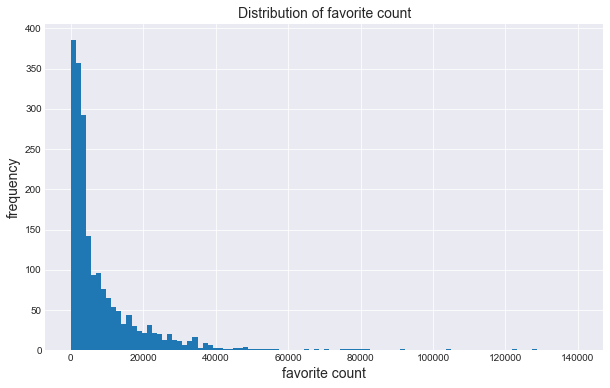

In [102]:
bin_boundaries = np.linspace(0,140000, 101)
plt.hist(df.favorite_count, bins=bin_boundaries)
plt.xlabel('favorite count')
plt.ylabel('frequency')
plt.title('Distribution of favorite count');

Favorite count data appear heavily right skewed.

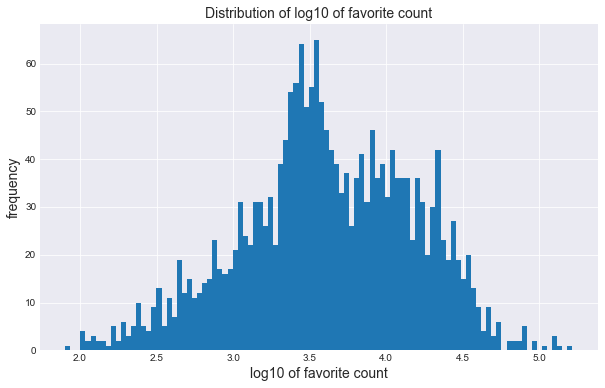

In [103]:
log_favorite = df['favorite_count'].apply(lambda x: np.log10(x))
plt.hist(log_favorite, bins=100)
plt.xlabel('log10 of favorite count')
plt.ylabel('frequency')
plt.title('Distribution of log10 of favorite count');

log10 of favorite count appear somewhat normally distributed.

#### Distribution of retweet count

In [104]:
df.retweet_count.describe()

count     1993.000000
mean      2672.776719
std       4759.302485
min         12.000000
25%        596.000000
50%       1286.000000
75%       3059.000000
max      84221.000000
Name: retweet_count, dtype: float64

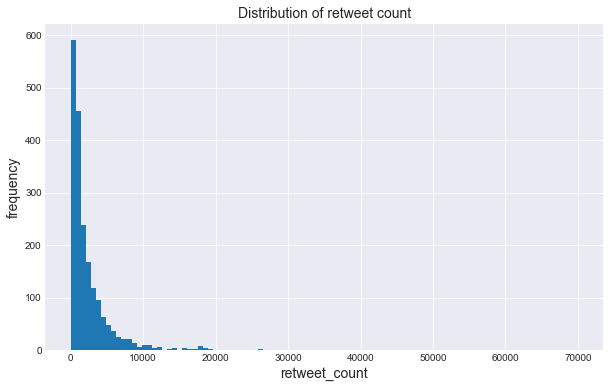

In [105]:
plt.hist(df.retweet_count, bins=np.linspace(0,70000, 101))
plt.xlabel('retweet_count')
plt.ylabel('frequency')
plt.title('Distribution of retweet count');

Similar to favorite count, retweet count data appear heavily right skewed.

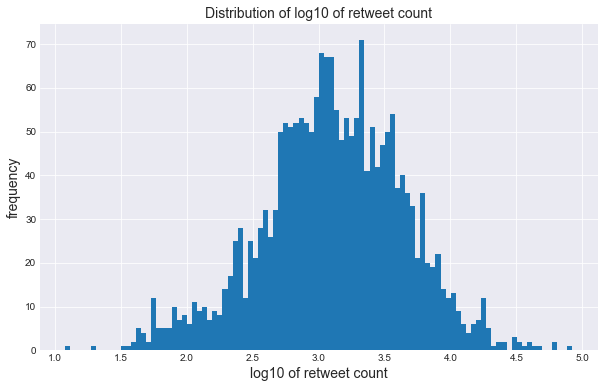

In [106]:
log_retweet = df['retweet_count'].apply(lambda x: np.log10(x))
plt.hist(log_retweet, bins=100)
plt.xlabel('log10 of retweet count')
plt.ylabel('frequency')
plt.title('Distribution of log10 of retweet count');

log10 of retweet count appear somewhat normally distributed.

#### Distribution of rating numerator

In [107]:
df.rating_numerator.describe()

count    1993.000000
mean       12.225178
std        41.481672
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [108]:
rating_counts = df.groupby(['rating_numerator']).count()['tweet_id']
rating_counts

rating_numerator
0.00         3
1.00         5
2.00         9
3.00        19
4.00        16
5.00        32
6.00        32
7.00        52
8.00        95
9.00       151
9.75         1
10.00      419
11.00      396
11.26        1
11.27        1
12.00      449
13.00      261
13.50        1
14.00       35
44.00        1
45.00        1
50.00        1
60.00        1
80.00        1
84.00        1
88.00        1
99.00        1
121.00       1
143.00       1
144.00       1
165.00       1
204.00       1
420.00       1
1776.00      1
Name: tweet_id, dtype: int64

Most ratings are integers that are 14 and below. By checking the tweets, ratings above 20 are usually given to images that contain more than one dog.

In [109]:
# subset dataframe to obtain rows that have ratings 14 and below and are integers
df_integer_ratings_14 = df[(df.rating_numerator <= 14) & (df.rating_numerator.apply(float.is_integer))]

# get the rating counts of the subset
subset_rating_counts = df_integer_ratings_14.groupby(['rating_numerator']).count()['tweet_id']
subset_rating_counts

rating_numerator
0.0       3
1.0       5
2.0       9
3.0      19
4.0      16
5.0      32
6.0      32
7.0      52
8.0      95
9.0     151
10.0    419
11.0    396
12.0    449
13.0    261
14.0     35
Name: tweet_id, dtype: int64

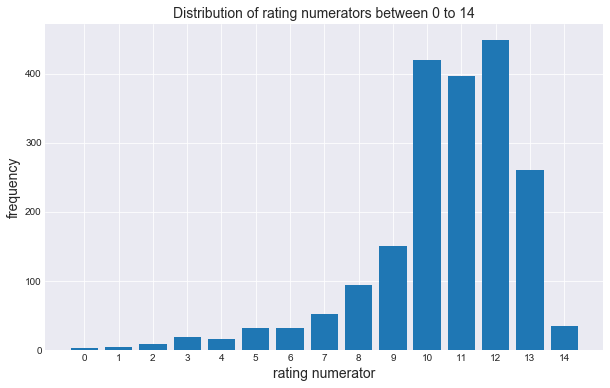

In [110]:
# plot the bar charts for distribution of rating numerators between 0 to 14
plt.bar(np.arange(15), subset_rating_counts)
plt.xticks(np.arange(15))
plt.xlabel('rating numerator')
plt.ylabel('frequency')
plt.title('Distribution of rating numerators between 0 to 14');

Most images are given a rating between 10 to 13.

### Bivariate Analysis

#### Favorite count over time

In [111]:
# The date of origin of "they're good dogs Brent" meme
good_dogs_meme_date = pd.to_datetime('2016-9-12')

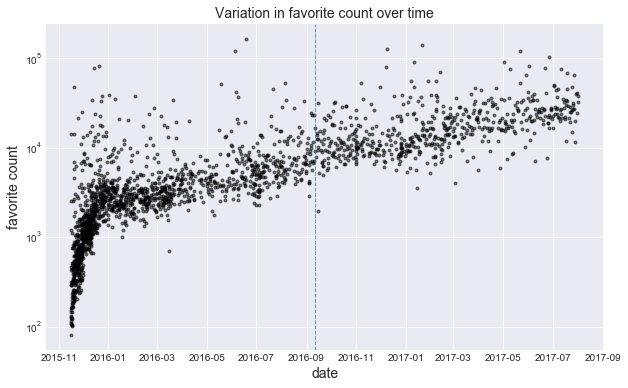

In [112]:
fig, ax = plt.subplots()
ax.plot_date(df.timestamp, df.favorite_count, alpha=0.5, ms=3, c='black')
# log transform the scale
ax.set_yscale('log')
plt.xlabel('date')
plt.ylabel('favorite count')
plt.title('Variation in favorite count over time')
plt.axvline(good_dogs_meme_date, lw=1, ls='dashed', alpha=0.7);

Favorite count of the tweets in the WeRateDogs page increased rapidly between November 2015 and January 2016. Afterwards, there has been a steady increase over time. The date of origin of the ["they're good dogs Brent" ](https://knowyourmeme.com/memes/theyre-good-dogs-brent)meme is represented by the dash line. It seems that the appearance of the meme does not really affect the rate of increase in favorite count.

#### Retweet count over time

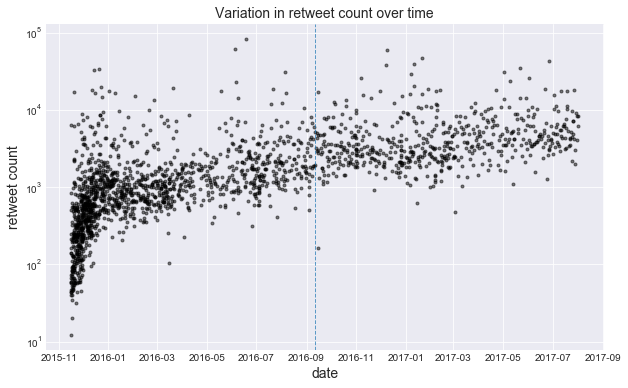

In [113]:
fig, ax = plt.subplots()
ax.plot_date(df.timestamp, df.retweet_count, alpha=0.5, ms=3, c='black')
# log transform the scale
ax.set_yscale('log')
plt.xlabel('date')
plt.ylabel('retweet count')
plt.title('Variation in retweet count over time')
plt.axvline(good_dogs_meme_date, lw=1, ls='dashed', alpha=0.7);

Similar to favorite counts, retweet counts increased rapidly between November 2015 and January 2016 and afterwards show a steady increase. The date of origin of the ["they're good dogs Brent"](https://knowyourmeme.com/memes/theyre-good-dogs-brent) meme is represented by the dash line. It seems that the appearance of the meme also does not seem to affect the rate of increase in retweet count.

#### Ratings numerator over time

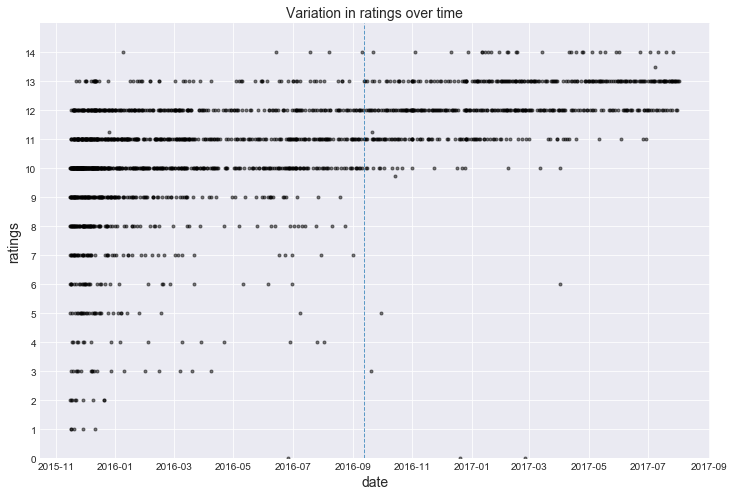

In [114]:
plt.figure(figsize=(12,8))
plt.plot_date(df.timestamp, df.rating_numerator, alpha=0.5, ms=3, c='black')
plt.ylim(0, 15)
plt.yticks(np.arange(15))
plt.xlabel('date')
plt.ylabel('ratings')
plt.title('Variation in ratings over time')
plt.axvline(good_dogs_meme_date, lw=1, ls='dashed', alpha=0.7);

In general, the ratings seem to increase over time. Interestingly, since the "they're good dogs Brent" incident, almost all dogs are given a rating above 10.

# References

Convert Tweepy Status Object into JSON https://stackoverflow.com/questions/27900451/convert-tweepy-status-object-into-json

The structure of the Status object of Tweepy https://gist.github.com/dev-techmoe/ef676cdd03ac47ac503e856282077bf2

Twitter API - get tweets with specific id https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

Tweepy documentation http://tweepy.readthedocs.io/en/v3.5.0/index.html

Reading and Writing JSON to a File in Python http://stackabuse.com/reading-and-writing-json-to-a-file-in-python/

Clear cell output in a loop https://stackoverflow.com/questions/24816237/ipython-notebook-clear-cell-output-in-code

Use astype() when NaN is present in pandas series https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe
